# Libraries

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.metrics import(precision_score, recall_score, confusion_matrix, classification_report, accuracy_score)
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Dataset

**Dataset Link**

[Air Quality and Pollution Assessment](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [147]:
# Run this cell if you are using Google Colab
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/MyDrive/Project/airPollutions.csv")
df.replace("NaN", np.nan, inplace=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319.0,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611.0,NaN
2,23.1,NaN,26.7,33.8,24.4,12.6,1.63,5.2,619.0,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,NaN,11.1,551.0,Good
4,26.5,70.7,6.9,16.0,21.9,NaN,1.01,12.7,303.0,Good


In [ ]:
# If you are using Google Colab no need to run this cell.
df = pd.read_csv('Dataset/airPollutions.csv')
df.replace("NaN", np.nan, inplace=True)
df.head()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4627 non-null   float64
 1   Humidity                       4598 non-null   float64
 2   PM2.5                          4633 non-null   float64
 3   PM10                           4633 non-null   float64
 4   NO2                            4641 non-null   float64
 5   SO2                            4595 non-null   float64
 6   CO                             4577 non-null   float64
 7   Proximity_to_Industrial_Areas  4626 non-null   float64
 8   Population_Density             4636 non-null   float64
 9   Air Quality                    4587 non-null   object 
dtypes: float64(9), object(1)
memory usage: 390.8+ KB


In [149]:
df.shape

(5000, 10)

### Target

In [150]:
target = 'Air Quality'

### Bar Chart

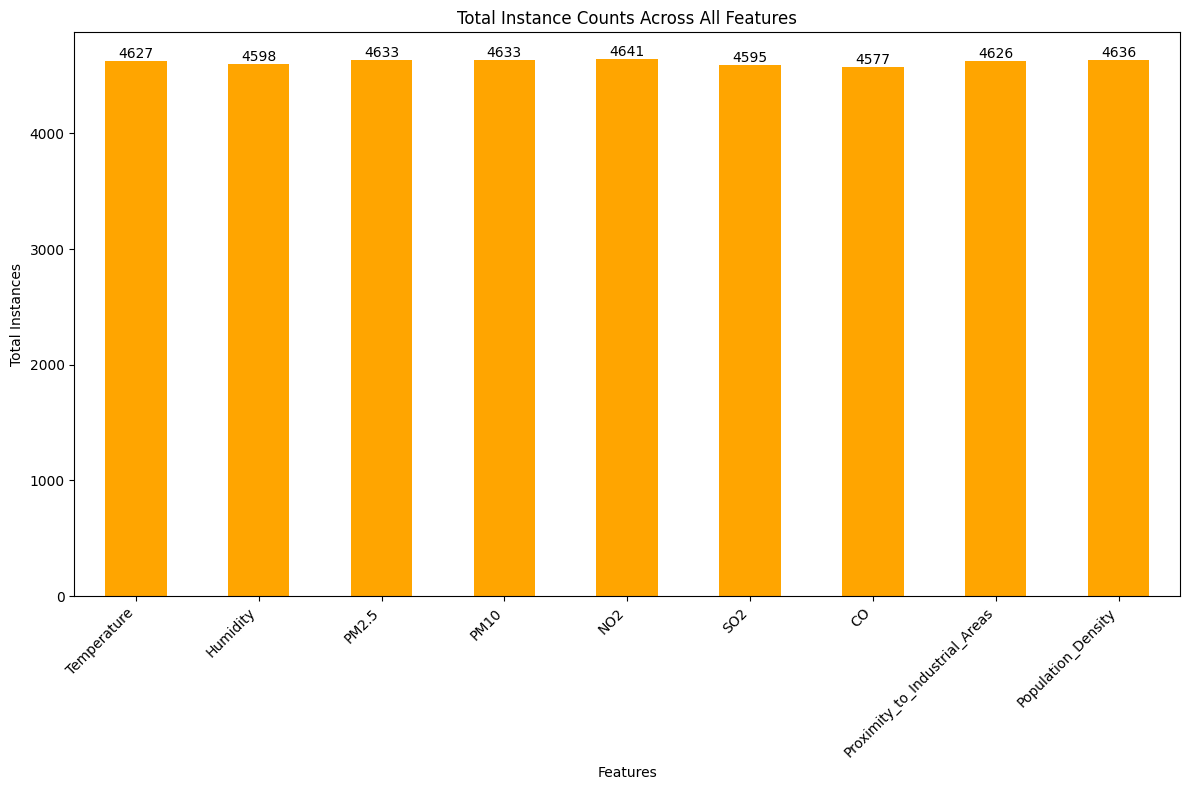

In [151]:
totalCounts = df.drop(columns=[target]).count()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = totalCounts.plot(kind='bar', color='orange')
plt.title('Total Instance Counts Across All Features')
plt.xlabel('Features')
plt.ylabel('Total Instances')

# Annotate total instance counts above each bar
for i, value in enumerate(totalCounts):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Class Distribution

In [152]:
# unique class & their counts in the dataset
classCounts = df[target].value_counts()
print(classCounts)

Air Quality
Good         1840
Moderate     1372
Poor          905
Hazardous     470
Name: count, dtype: int64


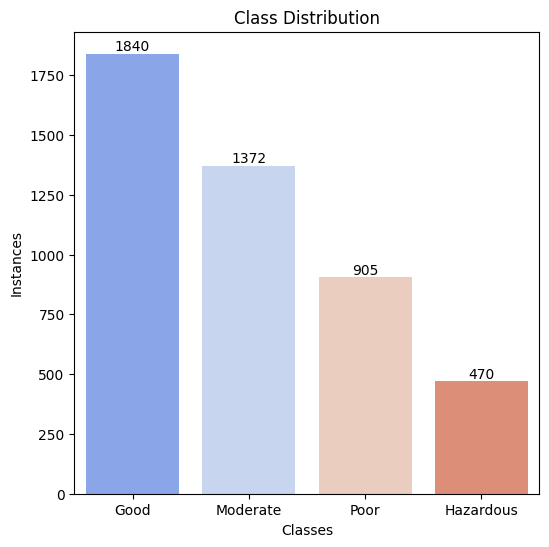

In [153]:
plt.figure(figsize=(6,6))
sns.barplot(x = classCounts.index, y = classCounts.values, palette = 'coolwarm', hue = classCounts.index, legend = False)

plt.xlabel('Classes')
plt.ylabel('Instances')
plt.title('Class Distribution')

for i, c in enumerate(classCounts.values):
    plt.text(i, c, str(c), ha = 'center', va = 'bottom')

plt.show()

# Categorical to Numerical

In [154]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert all categorical columns to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319.0,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611.0,4
2,23.1,NaN,26.7,33.8,24.4,12.6,1.63,5.2,619.0,2
3,27.1,39.1,6.1,6.3,13.5,5.3,NaN,11.1,551.0,0
4,26.5,70.7,6.9,16.0,21.9,NaN,1.01,12.7,303.0,0


# Correlation

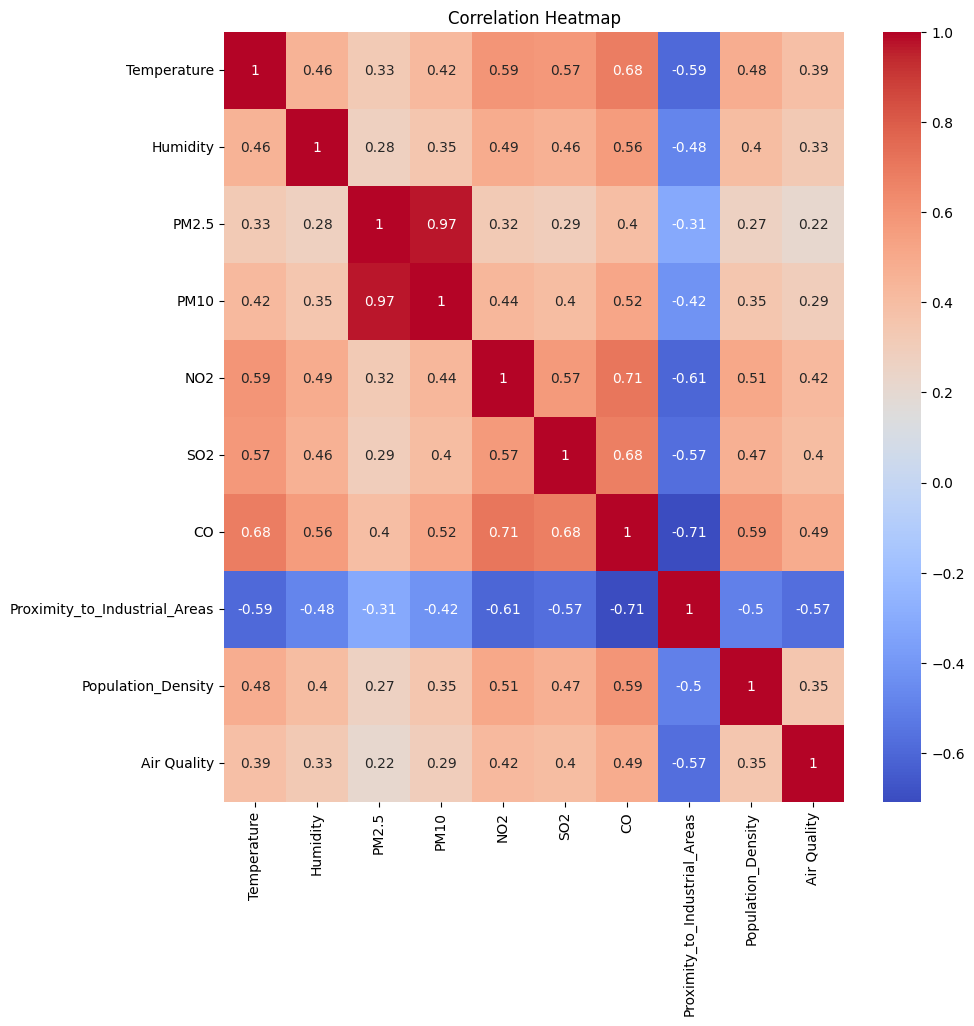

In [155]:
corrMatrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [156]:
df.isnull().sum()

,0
Temperature,373
Humidity,402
PM2.5,367
PM10,367
NO2,359
SO2,405
CO,423
Proximity_to_Industrial_Areas,374
Population_Density,364
Air Quality,0


In [157]:
# Handling missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)  # Replace with mode for categorical
        else:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)  # Replace with median for numerical

In [158]:
# Dropping PM10 as PM10 and PM2.5 highly correlated
df.drop(['PM10'], axis=1, inplace=True)

# Drop NULL value rows
df = df.dropna(axis=0, how='any')

print(df.shape)

(5000, 9)


In [159]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


# Scaling

In [160]:
x = df.drop(target, axis=1)
y = df[target]

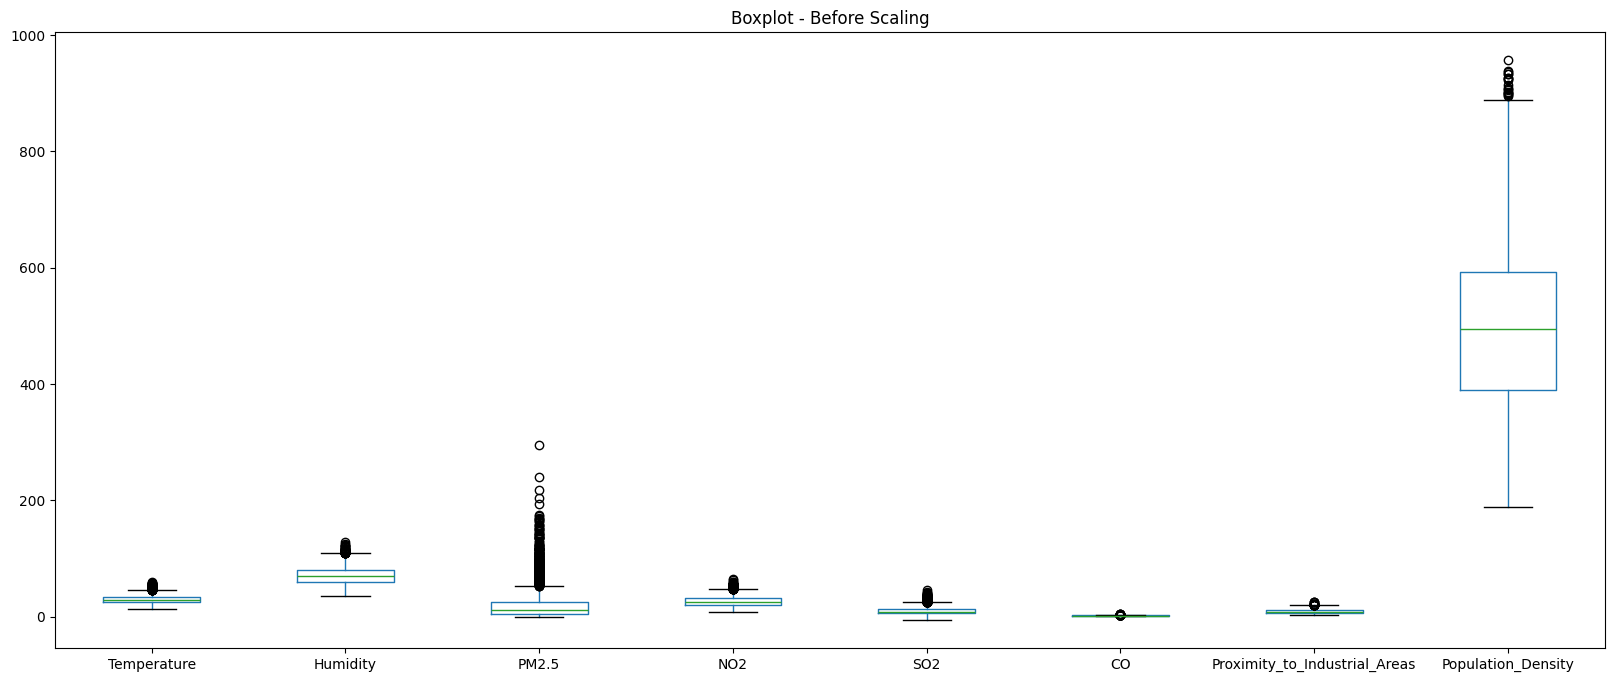

In [161]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - Before Scaling')
plt.show()

In [162]:
# Scaling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
df.head()

,Temperature,Humidity,PM2.5,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,18.9,9.2,1.72,6.3,319.0,2
1,28.3,75.6,2.3,30.8,9.7,1.64,6.0,611.0,4
2,23.1,69.8,26.7,24.4,12.6,1.63,5.2,619.0,2
3,27.1,39.1,6.1,13.5,5.3,1.41,11.1,551.0,0
4,26.5,70.7,6.9,21.9,8.0,1.01,12.7,303.0,0


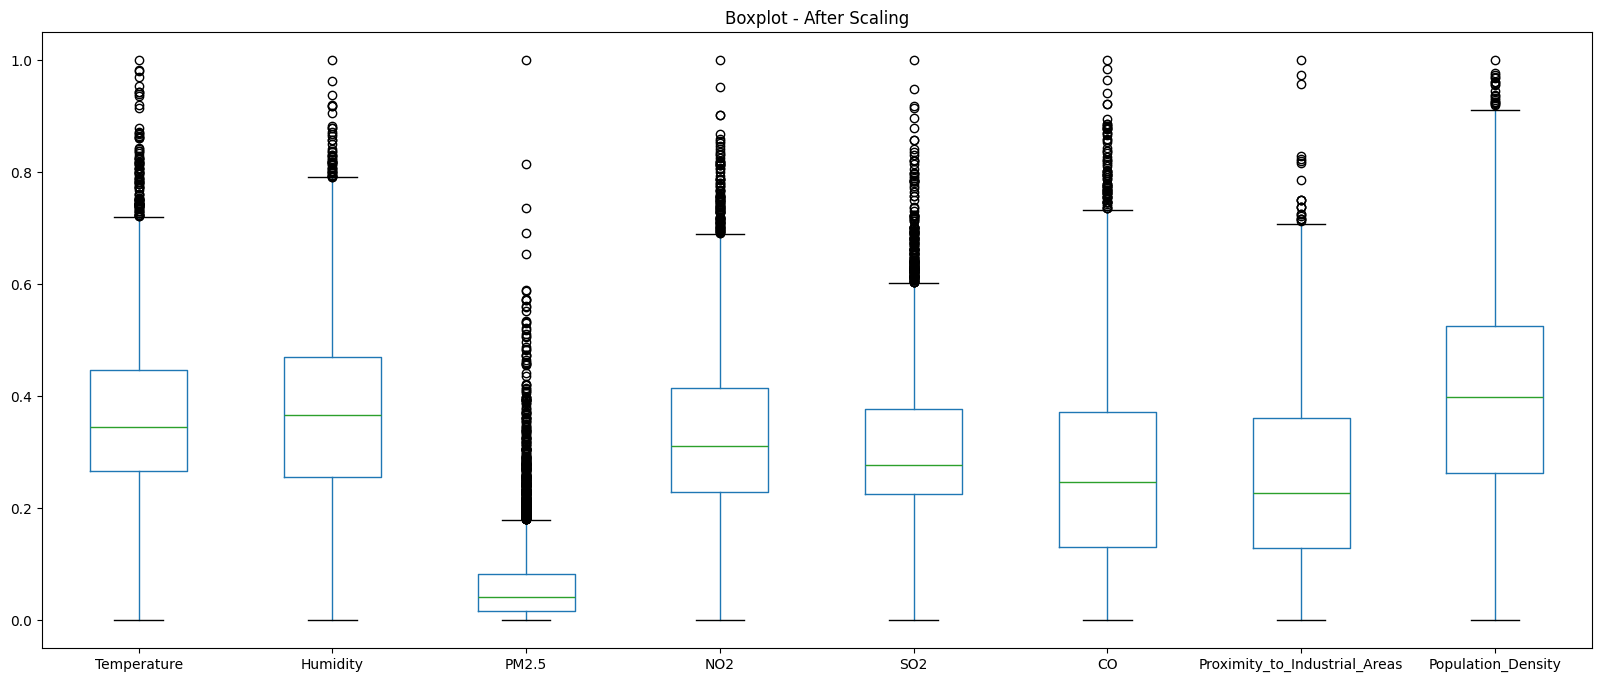

In [163]:
# Boxplot to visualize the distribution of multiple columns in the DataFrame
plt.figure(figsize=(20, 8))
x.boxplot(grid=False)
plt.title('Boxplot - After Scaling')
plt.show()

# Data Splitting, Training and Testing

In [164]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40, stratify=y)

In [165]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 691 to 1568
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    3500 non-null   float64
 1   Humidity                       3500 non-null   float64
 2   PM2.5                          3500 non-null   float64
 3   NO2                            3500 non-null   float64
 4   SO2                            3500 non-null   float64
 5   CO                             3500 non-null   float64
 6   Proximity_to_Industrial_Areas  3500 non-null   float64
 7   Population_Density             3500 non-null   float64
dtypes: float64(8)
memory usage: 246.1 KB


In [166]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 4761 to 4750
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    1500 non-null   float64
 1   Humidity                       1500 non-null   float64
 2   PM2.5                          1500 non-null   float64
 3   NO2                            1500 non-null   float64
 4   SO2                            1500 non-null   float64
 5   CO                             1500 non-null   float64
 6   Proximity_to_Industrial_Areas  1500 non-null   float64
 7   Population_Density             1500 non-null   float64
dtypes: float64(8)
memory usage: 105.5 KB


In [167]:
yTrain.info()

<class 'pandas.core.series.Series'>
Index: 3500 entries, 691 to 1568
Series name: Air Quality
Non-Null Count  Dtype
--------------  -----
3500 non-null   int64
dtypes: int64(1)
memory usage: 54.7 KB


In [168]:
yTest.info()

<class 'pandas.core.series.Series'>
Index: 1500 entries, 4761 to 4750
Series name: Air Quality
Non-Null Count  Dtype
--------------  -----
1500 non-null   int64
dtypes: int64(1)
memory usage: 23.4 KB


# Models

## Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(xTrain, yTrain)

ypredLR = modelLR.predict(xTest)

# accuracy
accuracyLR = round(accuracy_score(yTest, ypredLR) * 100, 2)

print(accuracyLR)

82.53


## Naive Bayes

In [170]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(xTrain, yTrain)

ypredNB = modelNB.predict(xTest)

# accuracy
accuracyNB = round(accuracy_score(yTest, ypredNB) * 100, 2)

print(accuracyNB)

82.93


## Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(xTrain, yTrain)

ypredRF = modelRF.predict(xTest)

# accuracy
accuracyRF = round(accuracy_score(yTest, ypredRF)*100, 2)

print(accuracyRF)

86.13


# Model Comparison

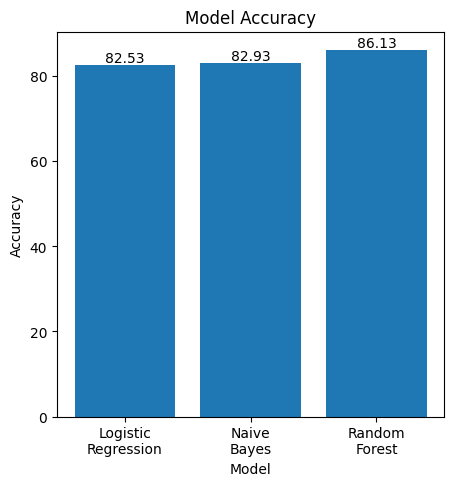

In [172]:
models = ['Logistic\nRegression', 'Naive\nBayes', 'Random\nForest']
accuracies = [accuracyLR, accuracyNB, accuracyRF]

plt.figure(figsize=(5, 5))
plt.bar(models, accuracies, tick_label=models)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for i in range(len(models)):
    plt.text(models[i], accuracies[i], str(accuracies[i]), ha='center', va='bottom')

plt.show()

# Precision and Recall Comparison

In [177]:
from sklearn.metrics import precision_score, recall_score

models = [
    ('Logistic Regression', ypredLR),
    ('Naive Bayes', ypredNB),
    ('Random Forest', ypredRF)
]

matrix = []

for model, yPred in models:
    precision = precision_score(yTest, yPred, average='weighted', zero_division=1)
    recall = recall_score(yTest, yPred, average='weighted', zero_division=1)

    matrix.append({'Model': model, 'Precision': precision, 'Recall': recall})

matrixDF = pd.DataFrame(matrix)
print(matrixDF)

                 Model  Precision    Recall
0  Logistic Regression   0.775073  0.825333
1          Naive Bayes   0.783228  0.829333
2        Random Forest   0.873610  0.861333


# Confusion Matrix

## Logistic Regression

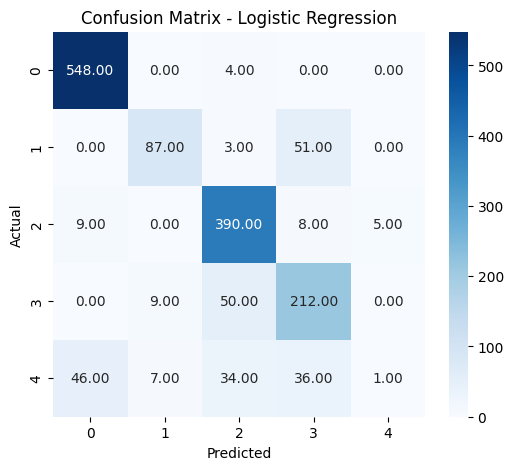

In [174]:
cmLR = confusion_matrix(yTest, ypredLR)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(cmLR, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Naive Bayes

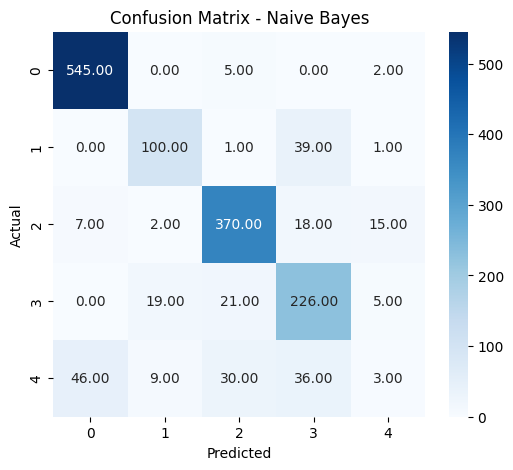

In [175]:
cmNB = confusion_matrix(yTest, ypredNB)

# Plotting the confusion matrix for Naive Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(cmNB, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

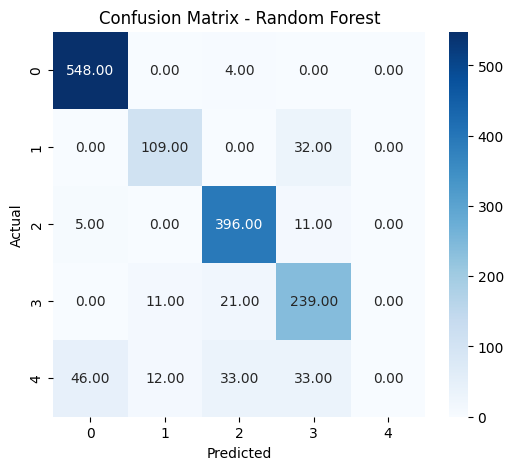

In [176]:
cmRF = confusion_matrix(yTest, ypredRF)

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cmRF, annot=True, fmt='.2f', cmap='Blues')

plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()